In [1]:
#Reading Data
import numpy as np

file_path = 'diabetes_scale.txt'
X = []
y = []
with open(file_path, 'r') as file:
    for line in file:
        elements = line.split()
        label = int(elements[0])
        y.append(label)
        features = np.zeros(8)
        for elem in elements[1:]:
            index, value = elem.split(':')
            features[int(index) - 1] = float(value)  
        X.append(features)
X = np.array(X)
y = np.array(y)
print("Features (X):", X)
print("Labels (y):", y)


Features (X): [[-0.294118    0.487437    0.180328   ...  0.00149028 -0.53117
  -0.0333333 ]
 [-0.882353   -0.145729    0.0819672  ... -0.207153   -0.766866
  -0.666667  ]
 [-0.0588235   0.839196    0.0491803  ... -0.305514   -0.492741
  -0.633333  ]
 ...
 [-0.411765    0.21608     0.180328   ... -0.219076   -0.857387
  -0.7       ]
 [-0.882353    0.266332   -0.0163934  ... -0.102832   -0.768574
  -0.133333  ]
 [-0.882353   -0.0653266   0.147541   ... -0.0938897  -0.797609
  -0.933333  ]]
Labels (y): [-1  1 -1  1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1 -1
 -1 -1 -1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1  1 -1  1  1
 -1  1  1  1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1 -1  1
 -1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1 -1  1  1  1  1 -1  1  1
  1  1  1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1
 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1 -1  1 -1 -1  1  1  1 -1  1  1  1

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


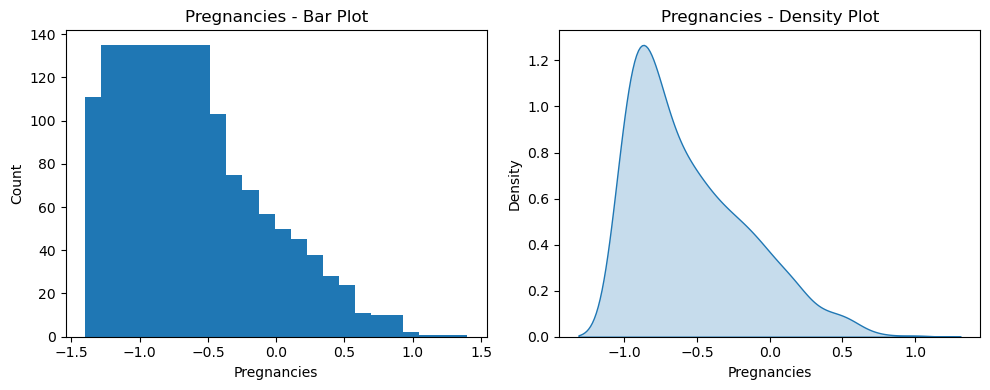

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


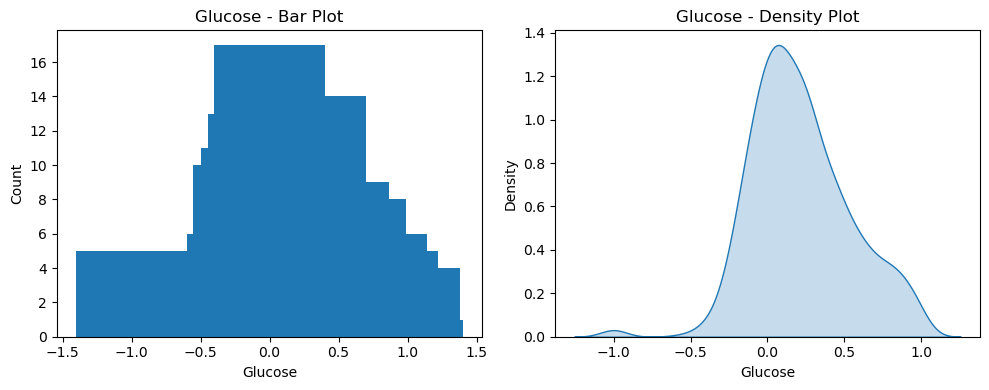

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


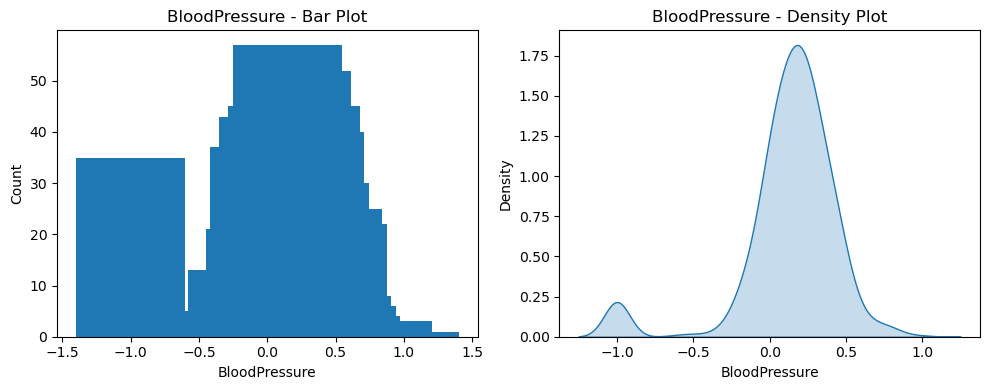

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


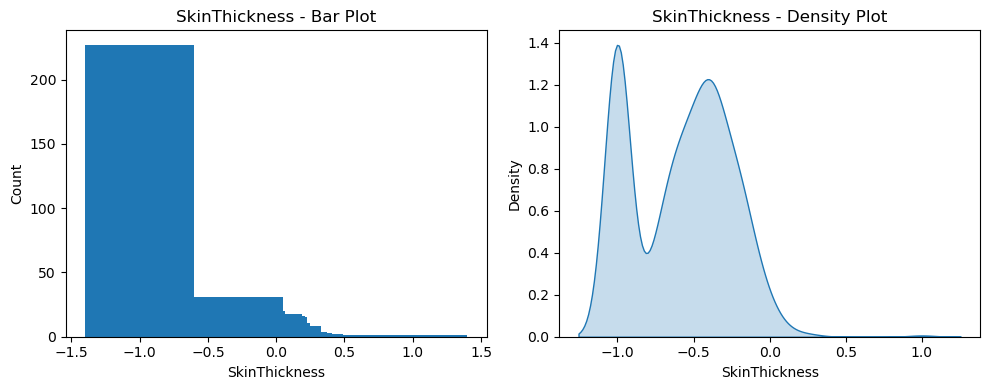

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


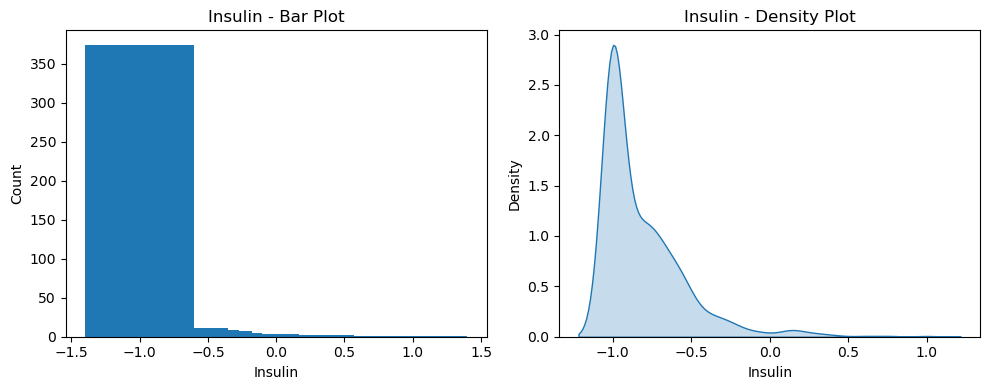

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


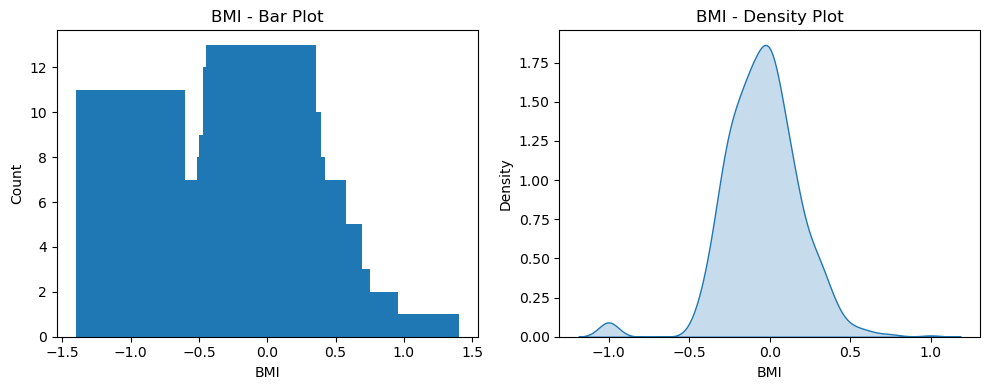

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


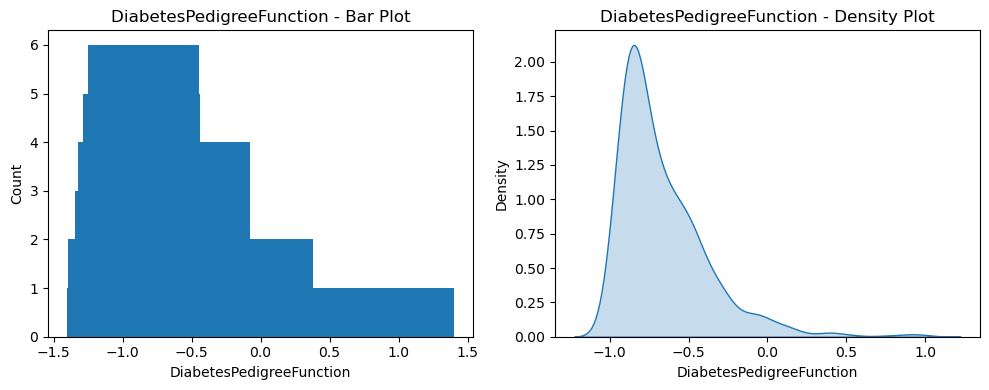

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8196\2148964307.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[feature], shade=True)


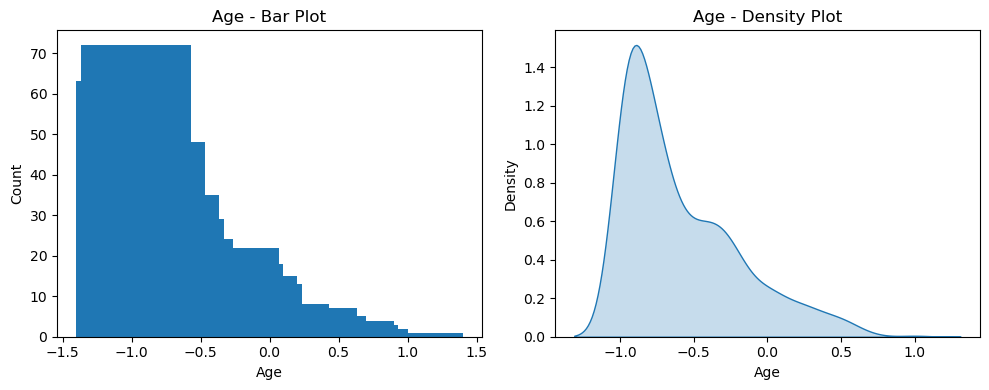

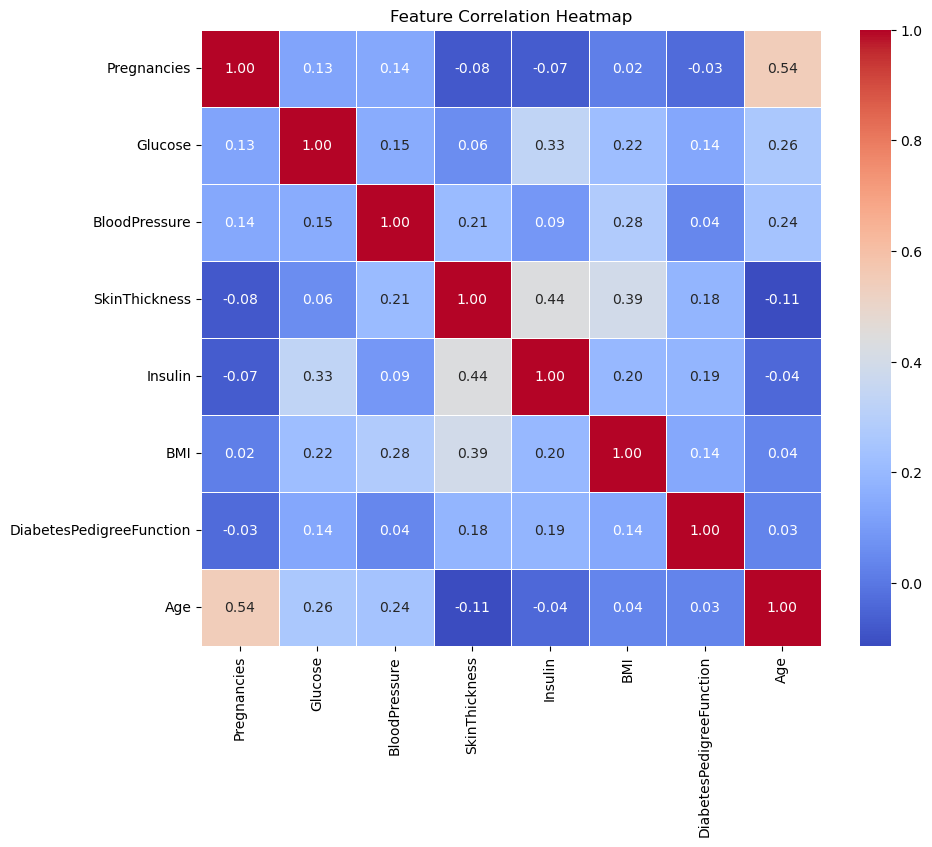

In [2]:
#Visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df = pd.DataFrame(X, columns=feature_names)
df['Label'] = y 
for feature in feature_names:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df[feature].value_counts().index, df[feature].value_counts().values)
    plt.title(f'{feature} - Bar Plot')
    plt.xlabel(feature)
    plt.ylabel('Count')


    plt.subplot(1, 2, 2)
    sns.kdeplot(df[feature], shade=True)
    plt.title(f'{feature} - Density Plot')
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(10, 8))
corr_matrix = df[feature_names].corr()  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [3]:
#Use linear SVM to verify whether the dataset is linearly separable
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)


y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


print(f"Train Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


print("\nClassification Report (Training Set):")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Train Accuracy: 77.20%
Test Accuracy: 75.97%

Classification Report (Training Set):
              precision    recall  f1-score   support

          -1       0.72      0.57      0.63       213
           1       0.79      0.88      0.83       401

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.77      0.77      0.76       614


Classification Report (Test Set):
              precision    recall  f1-score   support

          -1       0.67      0.65      0.66        55
           1       0.81      0.82      0.81        99

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

